In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [ ]:

df=pd.read_csv(r"C:\Users\pc\Desktop\employee-attrition-prediction\data\WA_Fn-UseC_-HR-Employee-Attrition.csv")
# print(df.head())
# print(df.info())
print(df.describe())


               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [ ]:
df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'] , axis=1,inplace=True)
print(df.head())
df.to_csv(r"C:\Users\pc\Desktop\employee-attrition-prediction\data\cleaned_employee_attrition.csv",index=False)
df=pd.read_csv(r"C:\Users\pc\Desktop\employee-attrition-prediction\data\cleaned_employee_attrition.csv")
# print(df.head())
print(df)

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...               

In [ ]:
# df_encoded = pd.get_dummies(df)
# df_encoded.to_csv(r"C:\Users\pc\Desktop\employee-attrition-prediction\data\encoded_employee_attrition.csv",index=False)
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df_encoded.astype(int)

# === 5. Save the encoded data ===
df_encoded.to_csv(r"C:\Users\pc\Desktop\employee-attrition-prediction\data\encoded_employee_attrition.csv", index=False)

print("✅ Data cleaned and saved to Desktop!")
df_encoded.info()
df_encoded.describe()
# print(df_encoded['Attrition_Yes'].describe())


✅ Data cleaned and saved to Desktop!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int32
 1   DailyRate                          1470 non-null   int32
 2   DistanceFromHome                   1470 non-null   int32
 3   Education                          1470 non-null   int32
 4   EnvironmentSatisfaction            1470 non-null   int32
 5   HourlyRate                         1470 non-null   int32
 6   JobInvolvement                     1470 non-null   int32
 7   JobLevel                           1470 non-null   int32
 8   JobSatisfaction                    1470 non-null   int32
 9   MonthlyIncome                      1470 non-null   int32
 10  MonthlyRate                        1470 non-null   int32
 11  NumCompaniesWorked                 1470 non-n

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728,0.282993
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530,0.450606
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


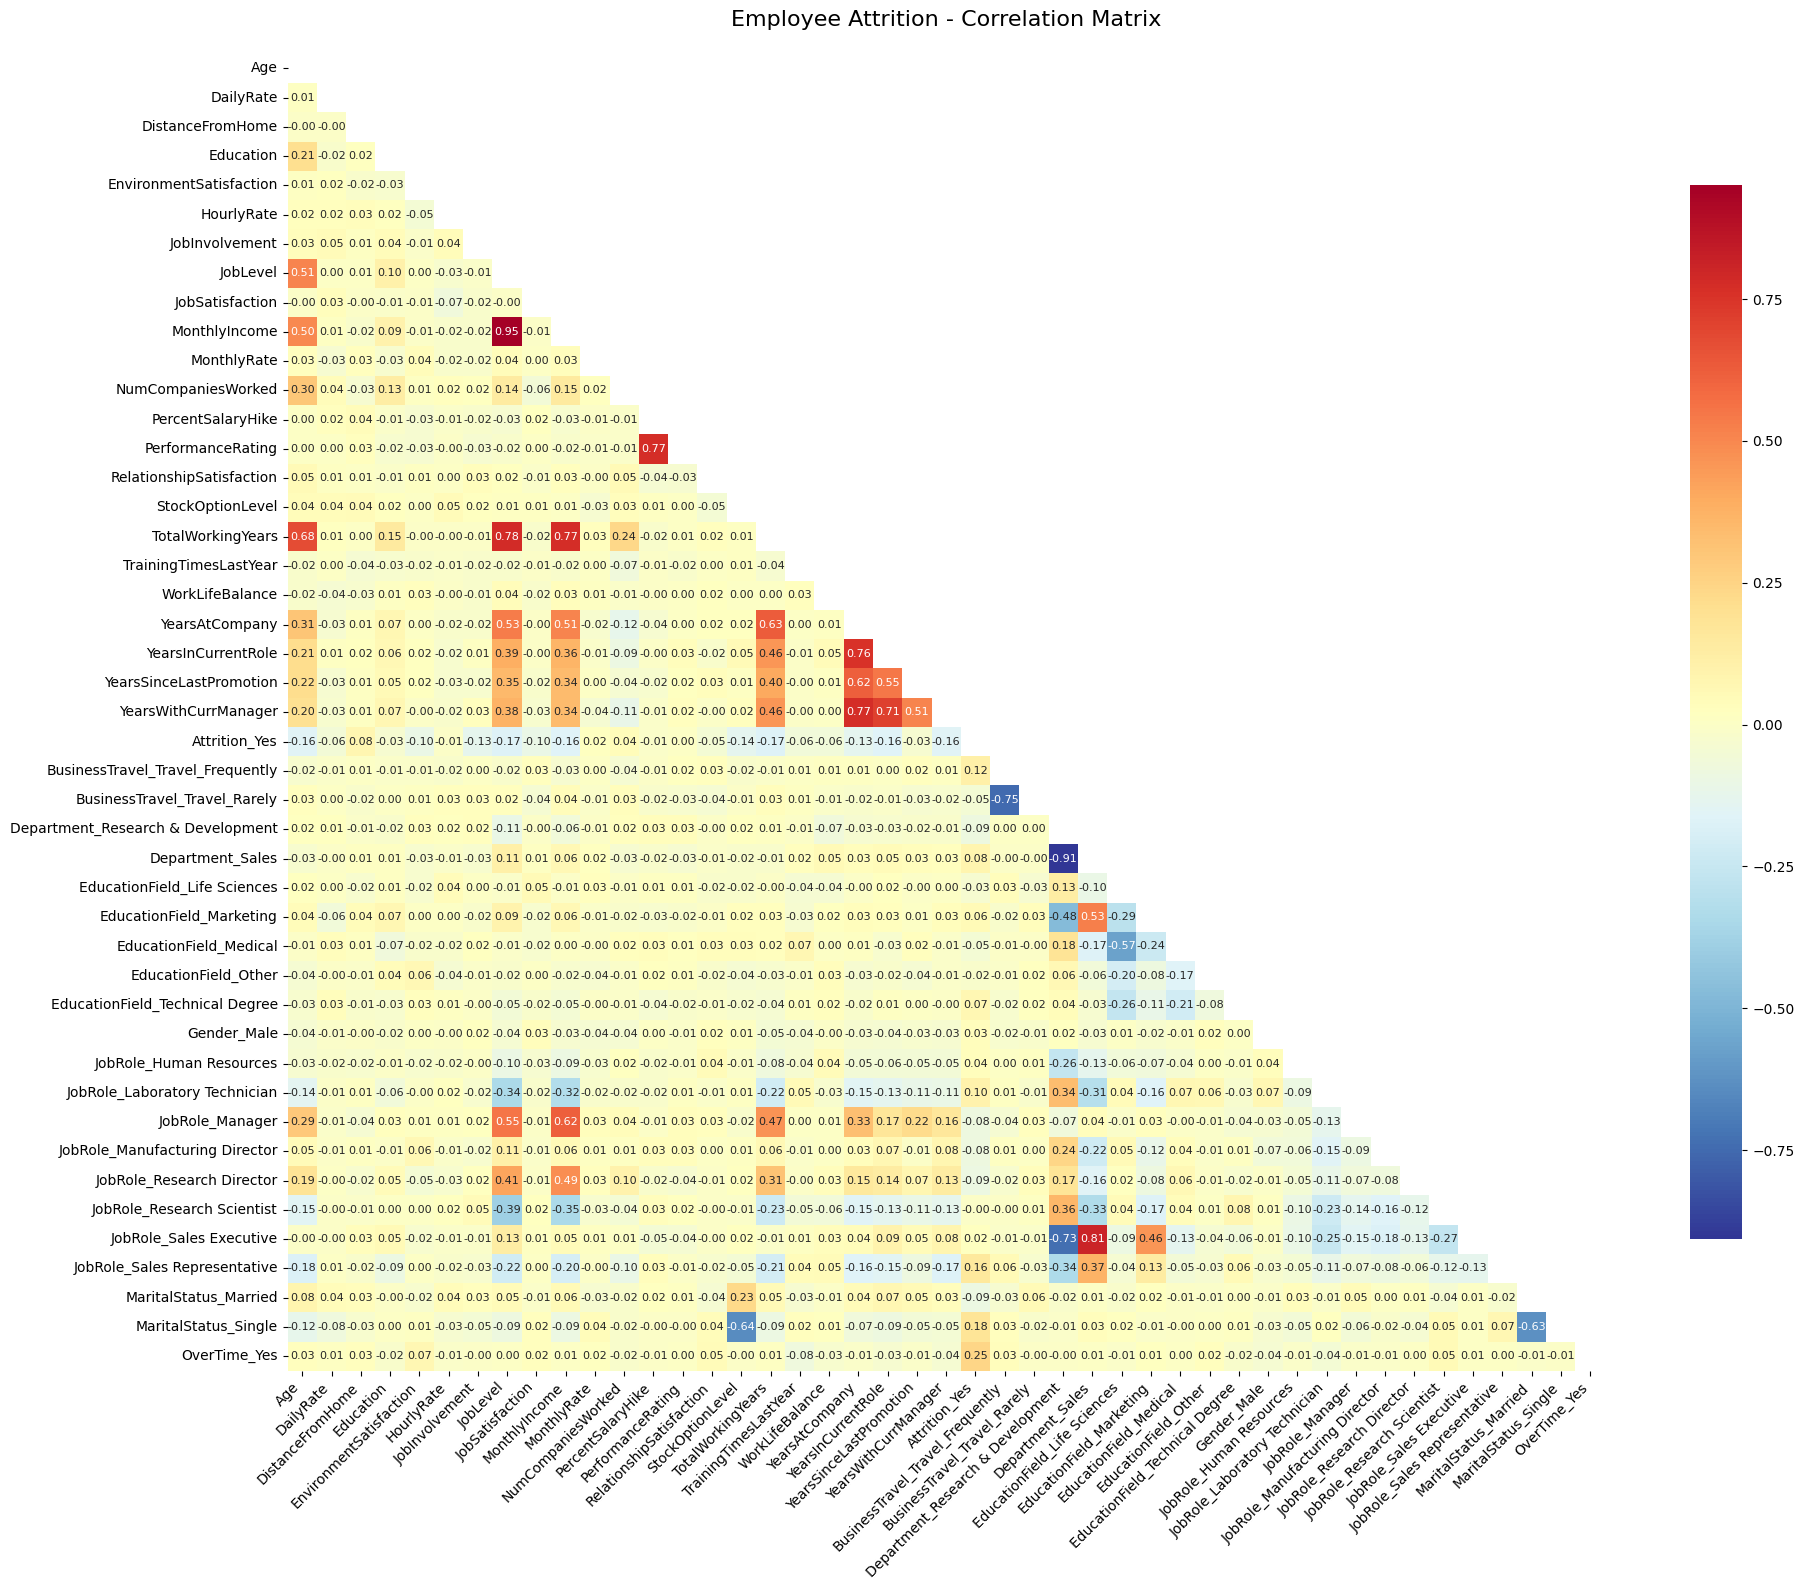

In [13]:
correlation_matrix = df_encoded.corr()

# Create a larger figure for better visibility
plt.figure(figsize=(20, 16))

# Create a mask for the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap with improved styling
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="RdYlBu_r",  # Better color scheme
            mask=mask,  # Show only lower triangle
            square=True,  # Square cells
            cbar_kws={"shrink": .8},  # Smaller colorbar
            annot_kws={"size": 8})  # Smaller annotation text

plt.title("Employee Attrition - Correlation Matrix", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




[2, 1, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 3, 1, 1, 4, 1, 2, 3, 1, 5, 2, 3, 5, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 2, 1, 2, 1, 2, 3, 2, 3, 3, 1, 2, 2, 2, 2, 5, 3, 3, 4, 2, 3, 1, 2, 1, 1, 2, 1, 2, 2, 3, 3, 2, 2, 1, 3, 2, 2, 3, 1, 1, 2, 4, 2, 2, 3, 2, 3, 2, 2, 4, 2, 1, 2, 2, 5, 5, 1, 1, 3, 4, 1, 2, 3, 3, 3, 1, 4, 1, 2, 5, 1, 1, 2, 1, 3, 3, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 4, 1, 1, 2, 3, 2, 2, 3, 2, 2, 1, 3, 1, 1, 1, 1, 3, 1, 5, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 5, 5, 2, 4, 5, 1, 1, 4, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 3, 3, 2, 3, 3, 3, 2, 2, 1, 3, 3, 2, 1, 1, 3, 3, 1, 5, 1, 5, 4, 5, 1, 1, 2, 2, 2, 5, 3, 1, 2, 1, 2, 3, 1, 2, 2, 2, 1, 5, 1, 1, 2, 2, 4, 2, 2, 2, 4, 1, 5, 1, 2, 1, 3, 3, 2, 2, 5, 4, 2, 2, 2, 2, 1, 2, 1, 5, 2, 1, 1, 4, 3, 1, 2, 4, 1, 2, 2, 3, 2, 2, 3, 2, 1, 2, 3, 1, 3, 4, 1, 4, 1, 2, 2, 2, 2, 2, 3, 5, 2, 5, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 3, 3, 2, 3, 1, 2, 2, 4, 2, 1, 1, 3, 2, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 3, 2, 1, 4, 2, 1, 1, 3, 1, 2, 1, 2, 4, 2, 5, 

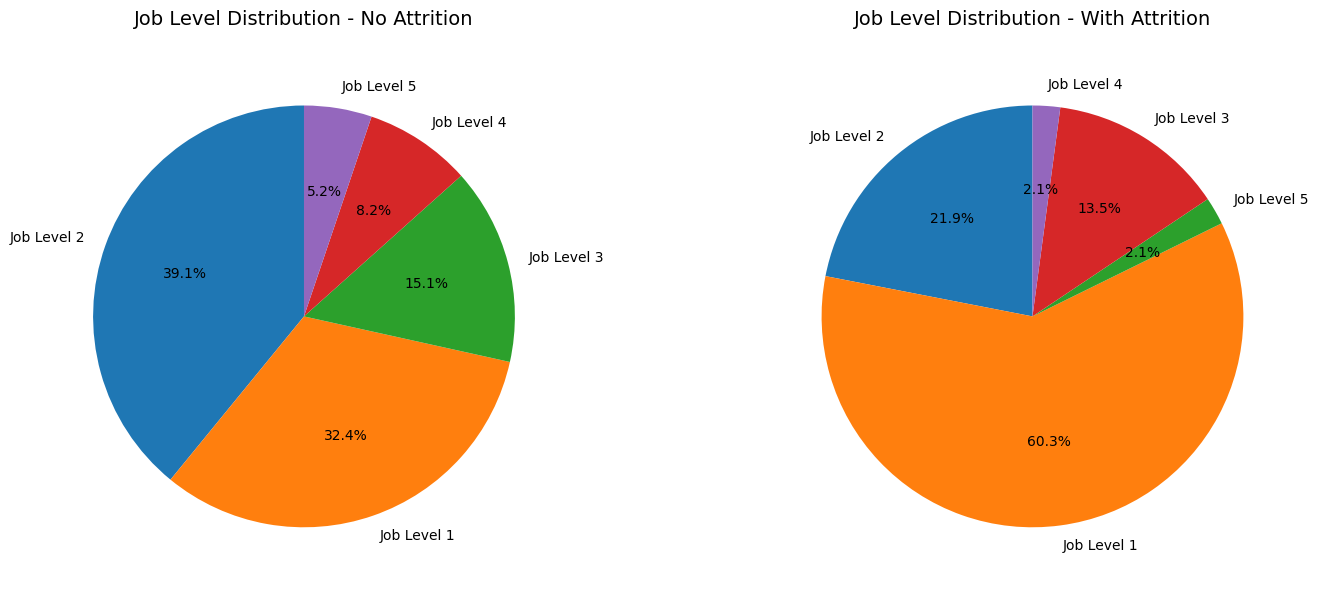

Job Level Distribution - No Attrition:
  Level 1: 400 employees
  Level 2: 482 employees
  Level 3: 186 employees
  Level 4: 101 employees
  Level 5: 64 employees

Job Level Distribution - With Attrition:
  Level 1: 143 employees
  Level 2: 52 employees
  Level 3: 32 employees
  Level 4: 5 employees
  Level 5: 5 employees


In [14]:
Xpoints=np.array(df_encoded['Attrition_Yes'])
Ypoints=np.array(df_encoded['JobLevel'])

# plt.Figure(figsize=(20,16))
# plt.bar(Ypoints,Xpoints)
# plt.show()
L0=[]
L1=[]

for i in range(len(Xpoints)):
        if Xpoints[i]==0:
              L0.append(Ypoints[i])
        else:
               L1.append(Ypoints[i])
               
print(L0)
print(L1)
print(len(L0)+len(L1))




# Count job levels for no attrition (L0)
job_levels_no_attrition = Counter(L0)
print(job_levels_no_attrition )
# Count job levels for attrition (L1)
job_levels_attrition = Counter(L1)
print(job_levels_attrition)

# Create subplots for two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart for No Attrition (L0)
if job_levels_no_attrition:
    labels_0 = [f'Job Level {level}' for level in job_levels_no_attrition.keys()]
    sizes_0 = list(job_levels_no_attrition.values())
    
    ax1.pie(sizes_0, labels=labels_0, autopct='%1.1f%%', startangle=90)
    ax1.set_title('Job Level Distribution - No Attrition', fontsize=14, pad=20)

# Pie chart for Attrition (L1)
if job_levels_attrition:
    labels_1 = [f'Job Level {level}' for level in job_levels_attrition.keys()]
    sizes_1 = list(job_levels_attrition.values())
    
    ax2.pie(sizes_1, labels=labels_1, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Job Level Distribution - With Attrition', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

# Print the counts for reference
print("Job Level Distribution - No Attrition:")
for level, count in sorted(job_levels_no_attrition.items()):
    print(f"  Level {level}: {count} employees")

print("\nJob Level Distribution - With Attrition:")
for level, count in sorted(job_levels_attrition.items()):
    print(f"  Level {level}: {count} employees")

In [15]:
k = 0
j = 0
for i in df_encoded['Attrition_Yes']:
    if i==0:
        k=k+1
    else:
        j=j+1
print('Number of employees would stay 0  k='+str(k))
print('Number of employees would leave 1  j='+str(j))

Number of employees would stay 0  k=1233
Number of employees would leave 1  j=237
